# 알고리즘 트레이딩 프로젝트
**박혜원, 최규수**

<table align="center">



  <td>
    <a target="_blank" href="https://github.com/sdtrd011/AlgorithmicTrading/blob/master/AlgorithmicTrading.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## Import modules

In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import cvxopt as opt
from cvxopt import solvers
import warnings

In [0]:
plt.style.use('default')

## Load dataset

In [0]:
os.getcwd()

'/content'

In [0]:
my_dir = "drive/My Drive/AlgorithmicTrading"
os.chdir(my_dir)
os.getcwd()

'/content/drive/My Drive/AlgorithmicTrading'

In [0]:
name = pd.read_excel("ETF.xlsx", sheet_name = 0, header = None, skiprows = 7, nrows = 2, index_col = 0)

In [0]:
name = name.T
name.head()

,Code,Name
1,A069500,KODEX 200
2,A069660,KOSEF 200
3,A091160,KODEX 반도체
4,A091170,KODEX 은행
5,A091180,KODEX 자동차


In [0]:
stock = pd.read_excel("ETF.xlsx", sheet_name = 0, header = None, skiprows = 14, index_col = 0)
marketcap = pd.read_excel("ETF.xlsx", sheet_name = 1, header = None, skiprows = 14, index_col = 0)
suspension = pd.read_excel("ETF.xlsx", sheet_name = 2, header = None, skiprows = 14)

In [0]:
suspension = suspension.drop(0, axis = 1)

In [0]:
stock.columns = name['Code']
marketcap.columns = name['Code']
suspension.columns = name['Code']

In [0]:
stock.index.name = 'Date'
marketcap.index.name = 'Date'

In [0]:
suspension.index = stock.index

In [0]:
stock.head()

Code,A069500,A069660,A091160,A091170,A091180,A091210,A091220,A091230,A098560,A099140,A100910,A101280,A102110,A102780,A102960,A102970,A104520,A104530,A105010,A105190,A105780,A108450,A108590,A114100,A114260,A114460,A114470,A114800,A114820,A117460,A117680,A117690,A117700,A122090,A122260,A122630,A123310,A123320,A130680,A130730,...,A305050,A305080,A305540,A305720,A306520,A306530,A306540,A306950,A306960,A307010,A307020,A307510,A307520,A307610,A307620,A308620,A309170,A309180,A309190,A309200,A309210,A309230,A310080,A310960,A310970,A314250,A314700,A315270,A315480,A315930,A315960,A316300,A316670,A319640,A319870,A322120,A322130,A322150,A322400,A322410
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-02,20269,20727,11495,8876,6826,32556,8896,10608,8646,19165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,20247,20788,11388,8777,7036,32548,8788,10589,8584,18770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,20341,20845,10958,8802,6826,32671,8800,10608,8700,18825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,19929,20475,10654,8673,6780,31960,8655,10340,8514,18605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,19861,20418,10586,8594,6734,31823,8589,10275,8382,18970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
sum(suspension.sum()) # 거래중지 1인 데이터 없으므로, suspension 데이터 활용 안 함.

0.0

In [0]:
def my_trim(data, date, sigma_date, pct):
  data = data.loc[:, ~np.isnan(data.loc[date, :])]
  data2 = data.loc[sigma_date:, :].pct_change(1).iloc[1:]

  sigma = data2.std()
  idx = sigma.index.values[sigma < sigma.describe()[pct]]

  name_df = name[name.Code.isin(idx)]
  return name_df


In [0]:
name_75 = my_trim(stock, '2012-04-27', '2014-04-28', "75%")
name_75

,Code,Name
1,A069500,KODEX 200
2,A069660,KOSEF 200
4,A091170,KODEX 은행
5,A091180,KODEX 자동차
6,A091210,TIGER KRX100
...,...,...
80,A152280,KOSEF 200 선물
81,A152380,KODEX 국채선물10년
83,A152870,파워 200
84,A153130,KODEX 단기채권


In [0]:
name_50 = my_trim(stock, '2012-04-27', '2014-04-28', "50%")
name_50

,Code,Name
1,A069500,KODEX 200
2,A069660,KOSEF 200
6,A091210,TIGER KRX100
11,A100910,KOSEF KRX100
12,A101280,KODEX 일본TOPIX100
13,A102110,TIGER 200
17,A104520,KOSEF 블루칩
18,A104530,KOSEF 고배당
20,A105190,KINDEX 200
21,A105780,KBSTAR 5대그룹주


In [0]:
name_75.to_csv("name_75.csv", index = False, encoding = 'cp949')
name_50.to_csv("name_50.csv", index = False, encoding = 'cp949')

In [0]:
name_100 = my_trim(stock, '2012-04-27', '2014-04-28', "max")
name_100

,Code,Name
1,A069500,KODEX 200
2,A069660,KOSEF 200
3,A091160,KODEX 반도체
4,A091170,KODEX 은행
5,A091180,KODEX 자동차
...,...,...
81,A152380,KODEX 국채선물10년
82,A152500,KINDEX 레버리지
83,A152870,파워 200
84,A153130,KODEX 단기채권


In [0]:
name_100.to_csv("name_100.csv", index = False, encoding = 'cp949')

## ETF selection criteria

In [0]:
stock2 = stock.loc['2012-04-27':, ~np.isnan(stock.loc['2012-04-27', :])]
stock2.head()

Code,A069500,A069660,A091160,A091170,A091180,A091210,A091220,A091230,A098560,A099140,A100910,A101280,A102110,A102780,A102960,A102970,A104520,A104530,A105010,A105190,A105780,A108450,A108590,A114100,A114260,A114460,A114470,A114800,A114820,A117460,A117680,A117690,A117700,A122090,A122260,A122630,A123310,A123320,A130680,A130730,...,A137930,A138230,A138520,A138530,A138540,A138910,A138920,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A139660,A140570,A140580,A140700,A140710,A140950,A143460,A143850,A143860,A144600,A145670,A145850,A147970,A148020,A148070,A150460,A152100,A152280,A152380,A152500,A152870,A153130,A153270
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-04-27,24171,24244,15697,6679,22558,39521,6843,15532,6104,16640,3980.0,8130.0,23710.0,6304.0,17894.0,5940.0,5802.0,5612.0,5339.0,24157.0,5057.0,9419.0,24158.0,91307.0,46072.0,87150.0,91138.0,7410.0,90409.0,10160.0,10203.0,11176.0,5301.0,16074.0,86949.0,13340.0,7920.0,11920.0,11200.0,87972.0,...,10476.0,11374.0,8508.0,5383.0,26912.0,8645.0,10865.0,5838.0,5631.0,8939.0,10570.0,12859.0,6262.0,7304.0,21028.0,7790.0,10655.0,9970.0,10038.0,9672.0,6682.0,5350.0,18250.0,5622.0,14565.0,10611.0,7915.0,8840.0,23359.0,17314.0,23863.0,89190.0,5717.0,24142.0,10860.0,50600.0,5080.0,24155.0,87805.0,18316.0
2012-04-30,24285,24299,15794,6530,23163,39507,6658,15598,6046,16900,3980.0,8225.0,23791.0,6384.0,18229.0,5949.0,5811.0,5565.0,5300.0,24373.0,5136.0,9617.0,24309.0,91376.0,46133.0,87200.0,91216.0,7380.0,90478.0,9978.0,10180.0,11239.0,5272.0,16167.0,86962.0,13450.0,7890.0,12030.0,11265.0,87976.0,...,10541.0,11328.0,8630.0,5270.0,27295.0,8845.0,10895.0,5739.0,5769.0,8925.0,10331.0,12883.0,6208.0,7313.0,21239.0,7855.0,10725.0,10005.0,10167.0,9695.0,6660.0,5518.0,18309.0,5654.0,14650.0,10631.0,7975.0,8805.0,23409.0,17319.0,23999.0,89318.0,5722.0,24239.0,10885.0,50735.0,5135.0,24288.0,87818.0,18362.0
2012-05-02,24472,24482,15833,6657,22990,39978,6782,15594,6050,16995,4017.0,8000.0,23962.0,6407.0,18775.0,6137.0,5830.0,5616.0,5300.0,24534.0,5136.0,9669.0,24391.0,91333.0,46133.0,87183.0,91207.0,7320.0,90461.0,10311.0,10281.0,11387.0,5430.0,16362.0,86979.0,13670.0,7840.0,12215.0,11340.0,88002.0,...,10625.0,11301.0,8710.0,5383.0,27552.0,8785.0,10935.0,5928.0,5812.0,9041.0,10685.0,12869.0,6333.0,7318.0,21234.0,7910.0,10720.0,10045.0,10229.0,9733.0,6753.0,5478.0,18464.0,5690.0,14665.0,10670.0,7850.0,8720.0,23596.0,17333.0,24172.0,89278.0,5683.0,24427.0,10945.0,50710.0,5220.0,24453.0,87831.0,18546.0
2012-05-03,24427,24423,15794,6749,22784,39895,6830,15655,6077,16675,3999.0,8050.0,23908.0,6422.0,18332.0,6137.0,5825.0,5633.0,5275.0,24447.0,5085.0,9660.0,24359.0,91454.0,46159.0,87230.0,91293.0,7330.0,90534.0,10389.0,10230.0,11344.0,5363.0,16311.0,87005.0,13635.0,7835.0,12205.0,11320.0,88024.0,...,10600.0,11319.0,8630.0,5289.0,27117.0,8665.0,10845.0,5857.0,5726.0,8976.0,10768.0,12831.0,6360.0,7372.0,20948.0,7795.0,10630.0,10010.0,10134.0,9700.0,6798.0,5473.0,18386.0,5672.0,14610.0,10847.0,7750.0,8740.0,23518.0,17417.0,24140.0,89388.0,5717.0,24358.0,10945.0,50790.0,5190.0,24407.0,87853.0,18436.0
2012-05-04,24271,24276,15848,6718,22479,39621,6870,15726,6109,16655,3980.0,8055.0,23764.0,6318.0,18485.0,6164.0,5887.0,5697.0,5241.0,24254.0,5062.0,9542.0,24231.0,91480.0,46180.0,87314.0,91336.0,7380.0,90577.0,10493.0,10313.0,11224.0,5239.0,16260.0,87047.0,13445.0,7900.0,12015.0,11050.0,88024.0,...,10536.0,11342.0,8527.0,5383.0,26874.0,8620.0,10810.0,5748.0,5817.0,8995.0,10925.0,12802.0,6378.0,7458.0,20840.0,7690.0,10515.0,10010.0,10239.0,9719.0,6811.0,5592.0,18250.0,5645.0,14505.0,10931.0,7665.0,8800.0,23437.0,17356.0,23981.0,89485.0,5769.0,24239.0,10865.0,50745.0,5120.0,24246.0,87866.0,18316.0


### Sharpe ratio

In [0]:
stock_rate = stock2.pct_change(1).iloc[1:]
sharpe_ratio = ((stock_rate.mean()*252 - 0.0075) / (stock_rate.std()*np.sqrt(252)))

In [0]:
sharpe_ratio.sort_values(ascending=False)

Code
A153130    4.027679
A130730    4.017248
A136340    2.442688
A114100    1.749655
A122260    1.150108
             ...   
A139220   -0.299347
A139230   -0.307224
A139310   -0.423336
A144600   -0.457022
A137610   -0.573477
Length: 85, dtype: float64

In [0]:
stock_rate_75 = stock.loc["2012-04-27":, np.asarray(name_75.Code)].pct_change(1).iloc[1:]

In [0]:
sharpe_75 = pd.DataFrame(((stock_rate_75.mean()*252 - 0.0075) / (stock_rate_75.std()*np.sqrt(252))).sort_values(ascending = False))
sharpe_75.head(10)

,0
Code,
A153130,3.879151
A130730,3.275494
A136340,2.193476
A114100,1.898183
A114470,1.832525
A114460,1.718263
A114260,1.473477
A133690,1.032616
A143850,0.947620


In [0]:
sharpe_75 = pd.merge(name, sharpe_75, how = "inner", left_on = "Code", right_on="Code")
sharpe_75.to_csv("sharpe_75.csv", index = False, encoding = "cp949")

### Correlation

In [0]:
pd.merge(pd.DataFrame(stock_rate_75.corr()['A143850'].sort_values()), name, how = "inner", left_on = "Code", right_on="Code")

,Code,A143850,Name
0,A123310,-0.583594,TIGER 인버스
1,A145670,-0.582448,KINDEX 인버스
2,A114800,-0.580677,KODEX 인버스
3,A138230,-0.326746,KOSEF 미국달러선물
4,A152380,-0.186333,KODEX 국채선물10년
...,...,...,...
58,A152100,0.585749,ARIRANG 200
59,A152870,0.588376,파워 200
60,A105190,0.590258,KINDEX 200
61,A133690,0.736307,TIGER 미국나스닥100


## Investment opportunity set

In [0]:
def create_data(code, data = stock2, period = "D"):
  
  data = data[code]

  if period == "M":
    size = 20
    year = 12
  elif period == "D":
    size = 1
    year = 252

  result = data.pct_change(size).iloc[size:]
  
  returns = result
  avg_rets = returns.mean()*year
  cov_mat = returns.cov()*year

  return returns, cov_mat, avg_rets

In [0]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret) :

  n = len(cov_mat)

  # Objective function
  P = opt.matrix(cov_mat.values)
  q = opt.matrix(0.0, (n, 1))

  # Constraints Gw <= h 
  G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
  h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

  # Constraints Aw = b
  A = opt.matrix(1.0, (1, n))
  b = opt.matrix(1.0)

  # Solve
  solvers.options['show_progress'] = False
  sol = solvers.qp(P, q, G, h, A, b)

  # Put weights into a labeled series
  w = pd.Series(sol['x'], index = cov_mat.index)

  return w

In [0]:
def plot_ios(code, rf = False):

  data, cov_mat, avg_rets = create_data(code, period="D")

  if rf:
    empty_cov = pd.DataFrame(np.zeros(9).reshape(3, 3))
    empty_cov.iloc[:2, :2] = cov_mat.values
    cov_mat = empty_cov

    avg_rets = avg_rets.append(pd.Series(0.0075))


  max_risk = 0.5
  max_ret = avg_rets.max()
  min_ret = avg_rets.min()

  n_step = 100
  step_diff = (max_ret - min_ret) / n_step

  risks = []
  rets = []
  sharp = []

  for step in range(n_step) : 
    target_ret = min_ret + (step * step_diff)
    _w = mean_var_portfolio(cov_mat, avg_rets, target_ret)
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))

    if risk > max_risk :
      break

    risks.append(risk)
    ret = np.dot(avg_rets, _w)
    rets.append(ret)
    sharp.append((ret - 0.0075) / risk)
  
  t_idx = np.argmax(sharp)
  

  plt.figure(figsize = (10, 4))
  plt.subplot(1, 2, 1)
  plt.plot(risks, rets, c = "#7864DF", lw = 3)
  var = np.diag(cov_mat)
  plt.scatter(np.sqrt(var), avg_rets, color = "#7864DF")

  plt.subplot(1, 2, 2)
  plt.plot(risks, rets,  c = "#7864DF", lw = 3)
  plt.plot([0, risks[t_idx]], [0.0075, rets[t_idx]], c = "#92D8A3", lw = 3)
  plt.scatter(risks[t_idx], rets[t_idx], color = "#DE7E73")

  plt.show()


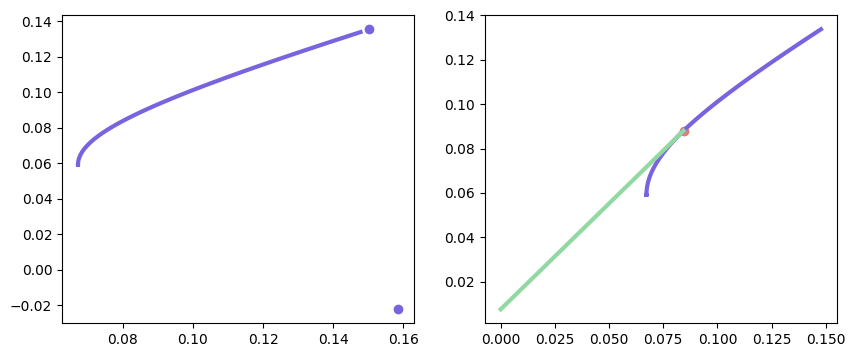

In [0]:
plot_ios(['A143850', 'A123310'], rf = False)

## Make portfolio

In [0]:
def tangency_portfolio(cov_mat, exp_rets, min_rets, max_rets, rf_rate = 0.0075, short = False):
  
  n = len(cov_mat)
  P = opt.matrix(cov_mat.values)
  q = opt.matrix(0.0, (n, 1))
  
  tangency_queue = []
  weights_queue = []
  return_queue = []
  cov_queue = []
  
  step = (max_rets - min_rets)/500
  minus_cnt = 0
  
  for i in range(500):
              
      try:
      
          target_ret = min_rets + (i * step)

          # Constraints Gx <= h
          if short == False:
            G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
            h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))
          if short == True:
            G = opt.matrix(-exp_rets.values).T
            h = opt.matrix(-target_ret)

          solvers.options['show_progress'] = False
          sol = solvers.qp(P, q, G, h)

          if sol['status'] != 'optimal':
              warnings.warn("Convergence problem")
              pass

          # Put weights into a labeled series
          weights = pd.Series(sol['x'], index=cov_mat.index)
          
          tangency_ = (np.dot(exp_rets, weights) - rf_rate) / np.sqrt(np.dot(np.dot(weights, cov_mat), weights))
          tangency_queue.append(tangency_)
          weights_queue.append(weights)
          return_queue.append(np.dot(exp_rets, weights))
          cov_queue.append(np.sqrt(np.dot(np.dot(weights, cov_mat), weights)))
      
      except:
          pass

  
  tan_index = tangency_queue.index(max(tangency_queue))
  
  weights = weights_queue[tan_index]

  return weights

In [0]:
def my_pf(code, short = False):
  _returns, _cov_mat, _avg_rets= create_data(code, data = stock2)
  _min_ret = _avg_rets.min()
  _max_ret = _avg_rets.max()

  _w = np.asarray(tangency_portfolio(_cov_mat, _avg_rets, _min_ret, _max_ret, short = short).values)
  _w /= _w.sum()
  _w = _w.reshape(_w.shape[0],1)

  exp_ret = np.dot(_avg_rets, _w) 
  exp_risk = np.sqrt(np.dot(np.dot(_w.T, _cov_mat), _w))

  return _w, exp_ret, exp_risk

In [0]:
w, ret, risk = my_pf(['A143850', 'A123310']) # S&P500 / inverse

In [0]:
w

array([[0.67277445],
       [0.32722555]])

In [0]:
w*0.85

array([[0.57185828],
       [0.27814172]])

In [0]:
d, cov, ret = create_data(['A143850', 'A123310'])

In [0]:
empty_cov = pd.DataFrame(np.zeros(9).reshape(3, 3))
empty_cov.iloc[:2, :2] = cov.values
cov = empty_cov

ret = ret.append(pd.Series(0.0075))

In [0]:
w = w*0.85
w = np.append(w, [0.15])
w

array([0.57185828, 0.27814172, 0.15      ])

In [0]:
ret

A143850    0.135357
A123310   -0.022391
0          0.007500
dtype: float64

In [0]:
cov

,0,1,2
0,0.022569,-0.014765,0.0
1,-0.014765,0.025123,0.0
2,0.000000,0.000000,0.0


In [0]:
exp_ret = np.dot(ret, w) 
exp_risk = np.sqrt(np.dot(np.dot(w.T, cov), w))
print("Expected return: ", exp_ret)
print("Expected volatility:", exp_risk)
print("Expected sharpe ratio:", (exp_ret - 0.0075) / exp_risk)

Expected return:  0.07230227048840672
Expected volatility: 0.0680239193382259
Expected sharpe ratio: 0.9526394703339481


## Back testing

In [0]:
def back_test(code, window_size, method = "tangency", rebalance_period = 20, short = False):

    # Window_size는 tangency portfolio를 구할 때 이전 몇 달의 데이터를 사용할 것인지 나타낸다.
    data = stock2.loc['2017-04-26':'2019-04-26', code]
    data_rf = pd.DataFrame(stock2.loc['2017-04-26':'2019-04-26', "A130730"])
    total_days = data.shape[0]

    returns, cov_mat, avg_rets= create_data(code, data = data)

    
    # n_rebalance : 총 몇 번의 리밸런싱을 하게 되는지?
    n_rebalance = int(returns.shape[0]/rebalance_period) - window_size
    w = []
    rebalancing_date=[]
    original_weights = []
    
    for i in range(n_rebalance, -1, -1): # n_rebalance, ... , 1, 0 까지 도는 코드
        
        # N일에 리밸런싱을 할 때에는 Tangency portfolio weight를 새로 구해야 한다. 이 때 N - window_size * rebalance_period부터 N - 1일 까지의 데이터를 사용한다.
        _returns, _cov_mat, _avg_rets= create_data(code, data = data.iloc[total_days - (window_size + i) * rebalance_period:
                                                             total_days - i * rebalance_period], period = "M")
        rebalancing_date.append(data.index[total_days - i * rebalance_period - 1])
        _r, _c, _rf_ret= create_data(["A130730"], data = data_rf.iloc[total_days - (window_size + i) * rebalance_period:
                                                             total_days - i * rebalance_period], period = "M")

        _min_ret = _avg_rets.min()
        _max_ret = _avg_rets.max()

        if method == "tangency":
          _w = np.asarray(tangency_portfolio(_cov_mat, _avg_rets, _min_ret, _max_ret, rf_rate = _rf_ret.values[0], short = short).values)
          _w /= _w.sum()
          _w = _w.reshape(_w.shape[0],1)
        elif method == "equal":
          _w = np.asarray([1/2, 1/2])
          _w = _w.reshape(2, 1)
        original_weights.append(_w)
        w.append(_w)

    price = data.T
    price = np.array(price)
    
    port = [] # 여기에 날마다 변하는 Portfolio value를 저장한다.
    port_date = [] # 여기에 portfolio의 data를 저장한다.
    portfolio_value = 10000
    port_weight = [] # 그 날의 portfolio의 구성이다. Ex) 만약 Asset1에 6000원, Asset2에 4000원, 나머지에 0원이 있다면 [6000, 4000, 0, 0, 0]이 된다.
    
    for i in range(n_rebalance, 0, -1):
        
        for j in range(rebalance_period):

            if j==0:

                # 리밸런싱을 하는 날이다. Portfolio value를 새로운 tangency portfolio weight로 맞춰준다.
                port_weight = portfolio_value * w[n_rebalance - i].T[0]

                # port_weight의 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_weight.sum()

                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
                
            else:

                # 여기는 리밸런싱이 아닌, 그냥 날짜가 지나는 부분이다. 각 날마다 자산의 가격이 바뀌므로, 리밸런싱을 하지 않아도 가격을 따라 port_weight가 변화한다.
                port_weight = port_weight * (price[:, total_days - i * rebalance_period + j] / 
                                             price[:, total_days - i * rebalance_period + j - 1])
                
                # port_weight의 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_weight.sum()

                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
                
            port_date.append(data.index[total_days - i * rebalance_period + j])

            #print(port_date[-1], portfolio_value)
    
    portfolio = pd.DataFrame(port, columns = ['portfolio_value'], index = port_date)
    
    return w, portfolio, original_weights, rebalancing_date

### With NO short sale

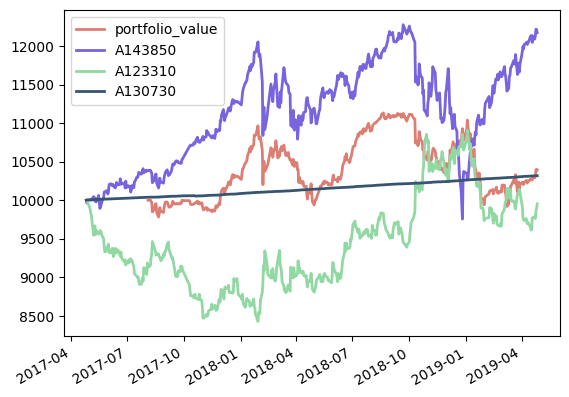

In [0]:
w, portfolio, original_weights, rebalancing_date = back_test(['A143850', 'A123310'], 3) # S&P / inverse
# Backtest Result Plotting
portfolio.plot(c = "#DE7E73", lw = 2)
codes = ['A143850', 'A123310', "A130730"]
colors = ["#7864DF", "#92D8A3", "#37556E"]
for i in range(3):
  code = codes[i]
  col = colors[i]
  plt.plot(stock.loc['2017-04-26':'2019-04-26', code] * 10000 / stock.loc['2017-04-26':'2019-04-26', code][0], label = code, c = col, lw = 2)

plt.legend()
plt.show()

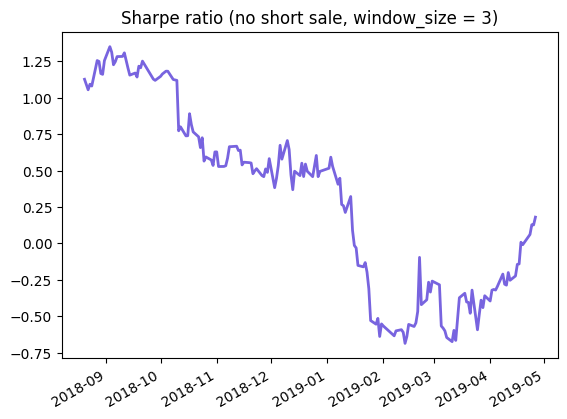

In [0]:
# Sharpe Ratio 계산

new_port = portfolio
new_port['returns'] = new_port['portfolio_value'].pct_change(1)

# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    return  (y.mean()*252 - 0.0075) / (y.std()*np.sqrt(252))
# Calculate rolling Sharpe ratio
new_port['rs'] = new_port['returns'].rolling(252).apply(my_rolling_sharpe)

new_port['rs'].plot(c = "#7864DF", lw = 2)
plt.title('Sharpe ratio (no short sale, window_size = 3)')
plt.show()

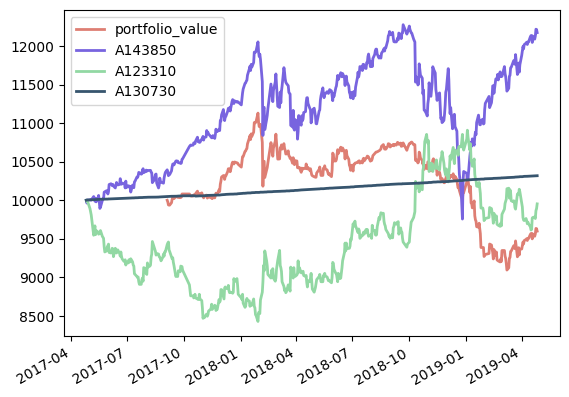

In [0]:
w, portfolio, original_weights, rebalancing_date = back_test(['A143850', 'A123310'], 4) # S&P / inverse
# Backtest Result Plotting
portfolio.plot(c = "#DE7E73", lw = 2)
codes = ['A143850', 'A123310', "A130730"]
colors = ["#7864DF", "#92D8A3", "#37556E"]
for i in range(3):
  code = codes[i]
  col = colors[i]
  plt.plot(stock.loc['2017-04-26':'2019-04-26', code] * 10000 / stock.loc['2017-04-26':'2019-04-26', code][0], label = code, c = col, lw = 2)

plt.legend()
plt.show()

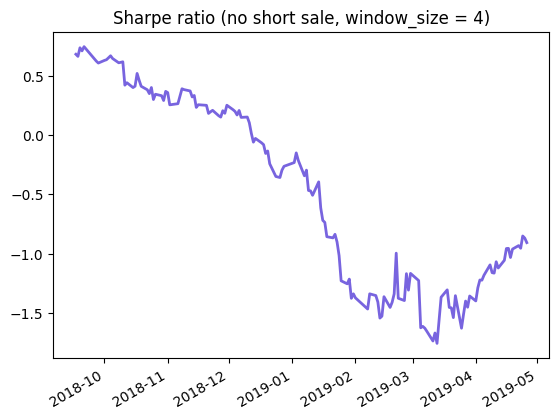

In [0]:
# Sharpe Ratio 계산

new_port = portfolio
new_port['returns'] = new_port['portfolio_value'].pct_change(1)

# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    return  (y.mean()*252 - 0.0075) / (y.std()*np.sqrt(252))
# Calculate rolling Sharpe ratio
new_port['rs'] = new_port['returns'].rolling(252).apply(my_rolling_sharpe)

new_port['rs'].plot(c = "#7864DF", lw = 2)
plt.title('Sharpe ratio (no short sale, window_size = 4)')
plt.show()

### Allow short sale

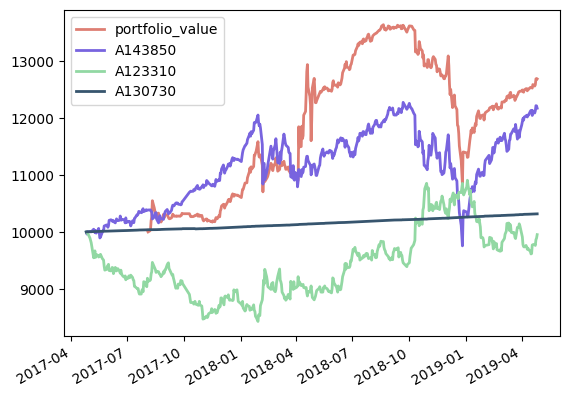

In [0]:
w, portfolio, original_weights, rebalancing_date = back_test(['A143850', 'A123310'], 3 ,short = True) # S&P / inverse
# Backtest Result Plotting
portfolio.plot(c = "#DE7E73", lw = 2)
codes = ['A143850', 'A123310', "A130730"]
colors = ["#7864DF", "#92D8A3", "#37556E"]
for i in range(3):
  code = codes[i]
  col = colors[i]
  plt.plot(stock.loc['2017-04-26':'2019-04-26', code] * 10000 / stock.loc['2017-04-26':'2019-04-26', code][0], label = code, c = col, lw = 2)

plt.legend()
plt.show()

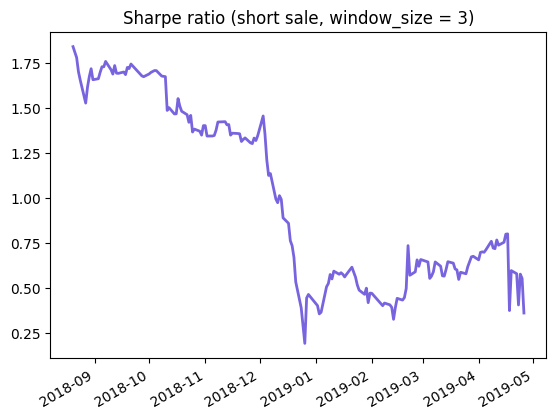

In [0]:
# Sharpe Ratio 계산

new_port = portfolio
new_port['returns'] = new_port['portfolio_value'].pct_change(1)

# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    return  (y.mean()*252 - 0.0075) / (y.std()*np.sqrt(252))
# Calculate rolling Sharpe ratio
new_port['rs'] = new_port['returns'].rolling(252).apply(my_rolling_sharpe)

new_port['rs'].plot(c = "#7864DF", lw = 2)
plt.title('Sharpe ratio (short sale, window_size = 3)')
plt.show()

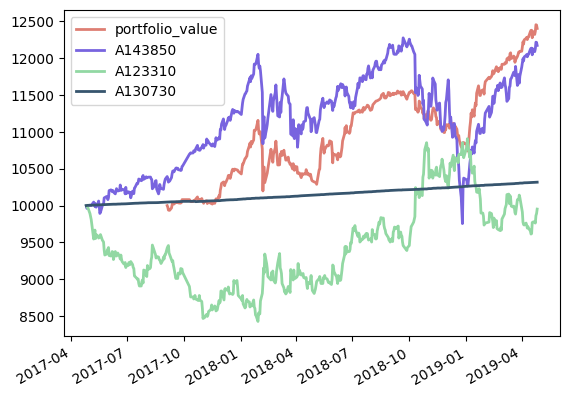

In [0]:
w, portfolio, original_weights, rebalancing_date = back_test(['A143850', 'A123310'], 4 ,short = True) # S&P / inverse
# Backtest Result Plotting
portfolio.plot(c = "#DE7E73", lw = 2)
codes = ['A143850', 'A123310', "A130730"]
colors = ["#7864DF", "#92D8A3", "#37556E"]
for i in range(3):
  code = codes[i]
  col = colors[i]
  plt.plot(stock.loc['2017-04-26':'2019-04-26', code] * 10000 / stock.loc['2017-04-26':'2019-04-26', code][0], label = code, c = col, lw = 2)

plt.legend()
plt.show()

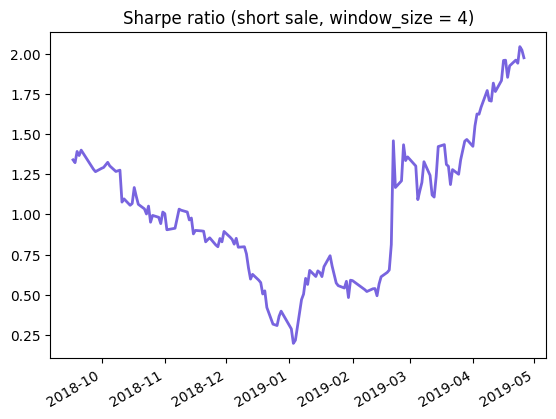

In [0]:
# Sharpe Ratio 계산

new_port = portfolio
new_port['returns'] = new_port['portfolio_value'].pct_change(1)

# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    return  (y.mean()*252 - 0.0075) / (y.std()*np.sqrt(252))
# Calculate rolling Sharpe ratio
new_port['rs'] = new_port['returns'].rolling(252).apply(my_rolling_sharpe)

new_port['rs'].plot(c = "#7864DF", lw = 2)
plt.title('Sharpe ratio (short sale, window_size = 4)')
plt.show()